In [1]:
import pandas as pd
import os
import numpy as np
from glob import glob

In [2]:
files = glob('listings_*')

In [3]:
files.sort()
files

['listings_1.csv',
 'listings_10.csv',
 'listings_11.csv',
 'listings_12.csv',
 'listings_2.csv',
 'listings_3.csv',
 'listings_4.csv',
 'listings_5.csv',
 'listings_6.csv',
 'listings_7.csv',
 'listings_8.csv',
 'listings_9.csv']

In [4]:
data = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

In [5]:
data_new = data.drop_duplicates()

In [6]:
data_new.shape

(443727, 16)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
data_new['price'].describe()

count    443727.000000
mean        154.870389
std         378.264649
min           0.000000
25%          65.000000
50%         100.000000
75%         169.000000
max       25000.000000
Name: price, dtype: float64

In [9]:
# dropping unnecessary column

data_new.drop('id', axis=1, inplace=True)
data_new.drop('host_id', axis=1, inplace=True)
data_new.drop('name', axis=1, inplace=True)
data_new.drop('host_name', axis=1, inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
data_new['reviews_per_month'].fillna(value=0,inplace=True)
data_new.drop('last_review',axis=1,inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
data_new.isnull().sum().sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
dtype: int64

In [12]:
#Tukey test will be implemented 

def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    return outliers_index

In [13]:
outliers_index = tukey_outliers(data_new,'price')


In [14]:
len(outliers_index)

25282

In [15]:
data_new.drop(outliers_index, inplace=True)
data_new.reset_index(drop=True, inplace=True)

In [16]:
print('we have {} listings with price equal to 0.'.format(len(data_new[data_new['price']==0])))

we have 144 listings with price equal to 0.


In [17]:
price_0 = data_new[data_new['price']==0]
price_0

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
20223,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.04,3,0
22387,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,18,0.63,6,0
22490,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.42,2,0
22513,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,3,5,0.19,1,9
22528,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,125,4.51,6,234
...,...,...,...,...,...,...,...,...,...,...,...
411528,Manhattan,Midtown,40.74749,-73.98717,Private room,0,1,4,0.50,5,0
411529,Manhattan,Midtown,40.74754,-73.98613,Private room,0,1,1,0.16,5,0
411531,Manhattan,Midtown,40.74735,-73.98705,Private room,0,1,2,0.24,5,0
411532,Manhattan,Midtown,40.74851,-73.98759,Private room,0,1,21,2.69,5,0


In [18]:
price_0['room_type'].value_counts()

Hotel room         54
Private room       52
Entire home/apt    38
Name: room_type, dtype: int64

In [19]:
data_new.drop(data_new[data_new['price']==0].index, inplace=True)


C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
data_new.reset_index(drop=True, inplace=True)


In [21]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,7,48,0.39,2,365
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,298,4.65,1,161
2,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,0.60,1,0


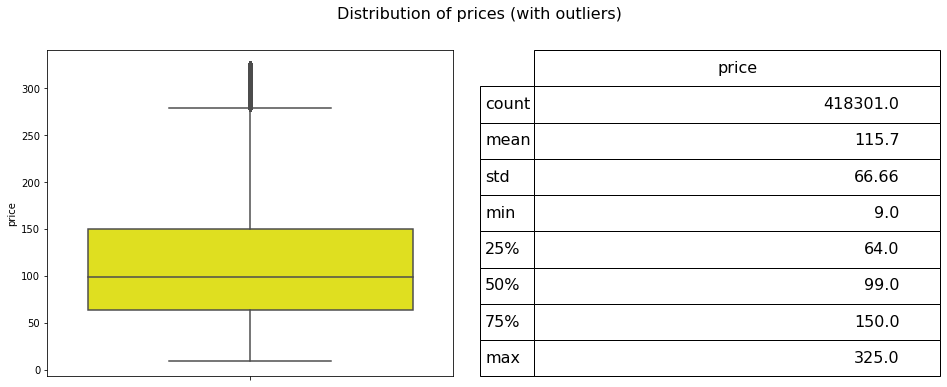

In [22]:
#Target:Price

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = data_new['price'], ax=ax1, color='yellow')
describe = data_new['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)
plt.show()

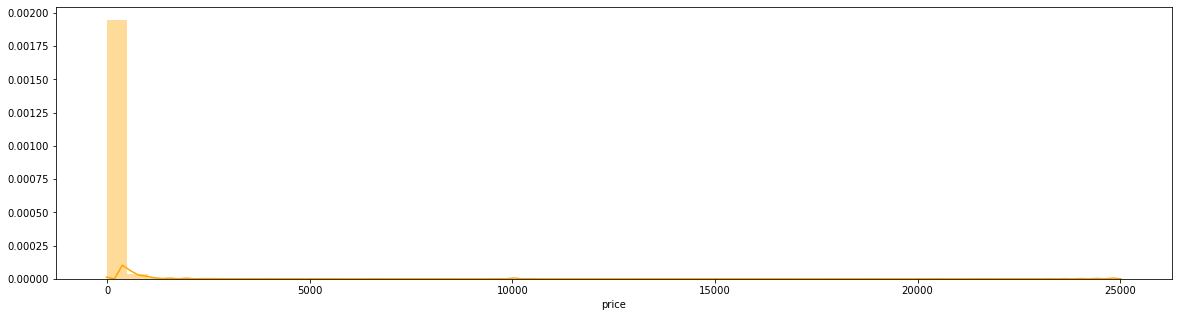

In [23]:
fig = plt.figure(figsize=(20,5))
sns.distplot(data['price'],color='orange')
plt.show()

In [24]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

skewed_features = []
for column in dists:
    skew = abs(data_new[column].skew())
    print('{:15}'.format(column), 
          'Skewness: {:05.2f}'.format(skew),'Min value: {}'.format(data_new[column].min()))

price           Skewness: 00.98 Min value: 9
minimum_nights  Skewness: 14.94 Min value: 1
calculated_host_listings_count Skewness: 06.70 Min value: 1
number_of_reviews Skewness: 03.41 Min value: 0
reviews_per_month Skewness: 03.98 Min value: 0.0
availability_365 Skewness: 00.51 Min value: 0


In [25]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer

In [26]:

#Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

In [27]:
data_new['price'],price_lambda = boxcox(data_new['price'])
print('"price lambda": {}'.format(price_lambda))

"price lambda": 0.08544784980940612


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
data_new['minimum_nights'],lam = boxcox(data_new['minimum_nights'])
print('"minimum_nights lambda": {}'.format(lam))

"minimum_nights lambda": -0.37577910280344384


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data_new['calculated_host_listings_count'],lam = boxcox(data_new['calculated_host_listings_count'])
print('calculated_host_listings_count: {}'.format(lam))

calculated_host_listings_count: -0.9952732586928884


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
values = data_new['number_of_reviews'].values
data1 = pd.DataFrame({'x':values})
pt.fit(data1)
print(pt.lambdas_)

[-0.05825883]


In [31]:
data_new['number_of_reviews']= boxcox1p(data_new['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))

"number_of_reviews lambda: [-0.05825883]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
values = data_new['reviews_per_month'].values
data2 = pd.DataFrame({'x':values})
pt.fit(data2)
print(pt.lambdas_)

[-0.97882508]


In [33]:
data_new['reviews_per_month']= boxcox1p(data_new['reviews_per_month'],pt.lambdas_)
print('"reviews_per_month lambda: {}"'.format(pt.lambdas_))

"reviews_per_month lambda: [-0.97882508]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
values = data_new['availability_365'].values
data3 = pd.DataFrame({'x':values})
pt.fit(data3)
print(pt.lambdas_)

[0.21229905]


In [35]:
data_new['availability_365']= boxcox1p(data_new['availability_365'],pt.lambdas_)
print('"availability_365 lambda: {}"'.format(pt.lambdas_))

"availability_365 lambda: [0.21229905]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
data_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,6.887315,1.380291,3.482156,0.281502,0.500726,11.781786
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,5.470900,0.000000,4.850514,0.834060,0.000000,9.161370
2,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,6.701155,0.900074,3.857641,0.376726,0.000000,0.000000
3,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,4.901924,1.910330,3.514008,0.281502,0.000000,0.000000
4,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,5.296881,0.610228,5.155718,0.788776,0.000000,10.287693


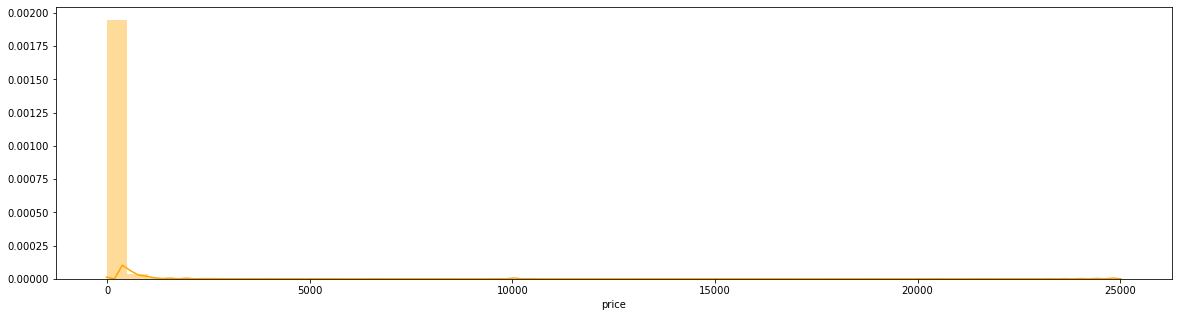

In [37]:
fig = plt.figure(figsize=(20,5))
sns.distplot(data['price'],color='orange')
plt.show()

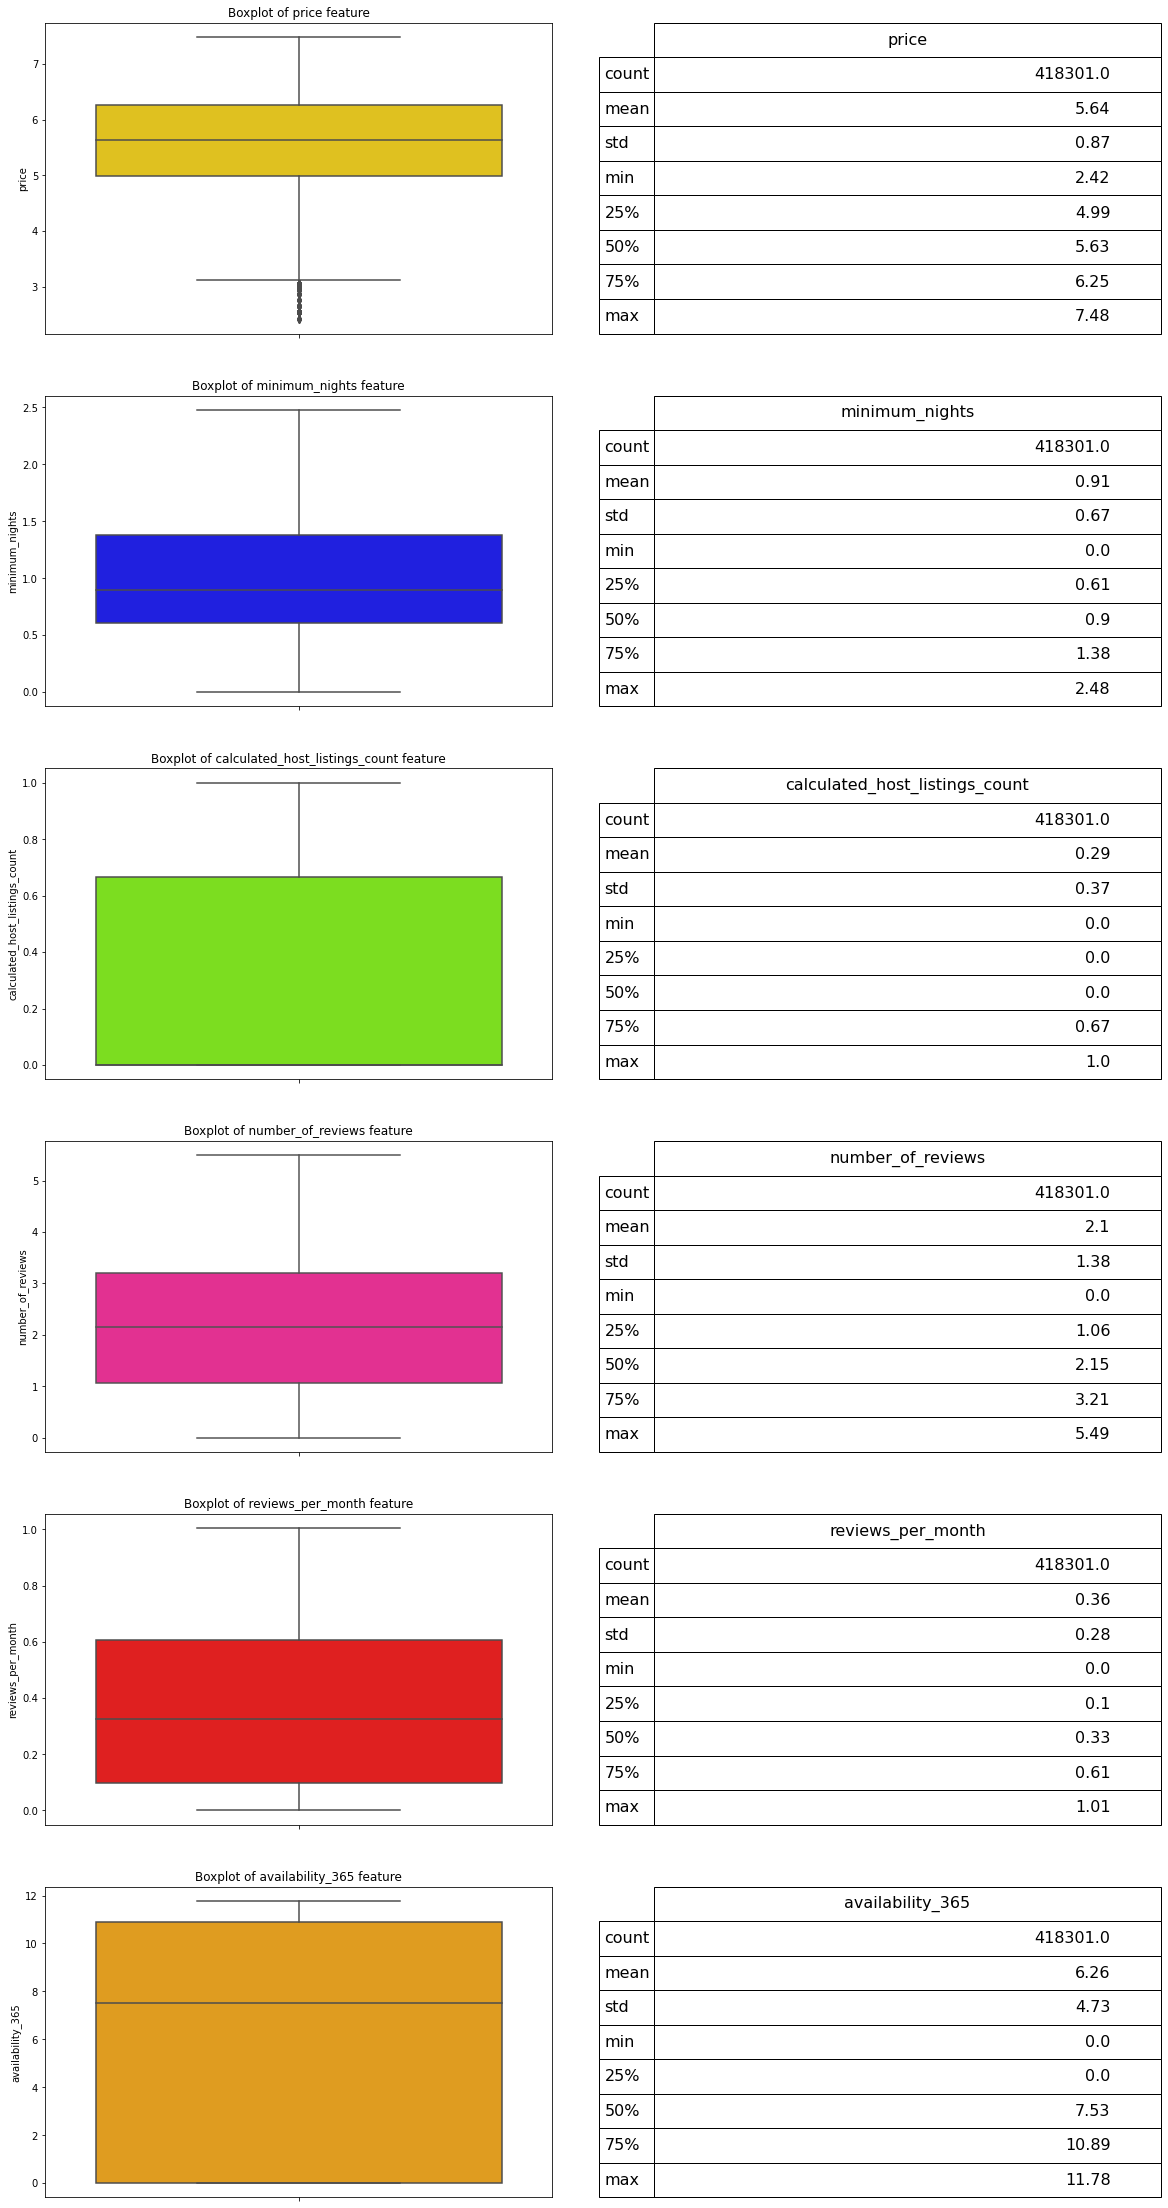

In [38]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

fig, ax = plt.subplots(6,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange','darkcyan','yellow']

for i in range(len(dists.columns)):
    describe = data_new[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=data_new[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

In [39]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [40]:
#transforming the categorical data
labelencoder = LabelEncoder()
data_new['neighbourhood'] = labelencoder.fit_transform(data_new['neighbourhood'])
data_new['neighbourhood_group'] = labelencoder.fit_transform(data_new['neighbourhood_group'])

C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,129,40.75362,-73.98377,Entire home/apt,6.887315,1.380291,3.482156,0.281502,0.500726,11.781786
1,1,41,40.68514,-73.95976,Entire home/apt,5.470900,0.000000,4.850514,0.834060,0.000000,9.161370
2,2,139,40.74767,-73.97500,Entire home/apt,6.701155,0.900074,3.857641,0.376726,0.000000,0.000000


In [42]:
data_new = pd.get_dummies(data_new)


In [43]:
data_new.head()


,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,129,40.75362,-73.98377,6.887315,1.380291,3.482156,0.281502,0.500726,11.781786,1,0,0,0
1,1,41,40.68514,-73.95976,5.470900,0.000000,4.850514,0.834060,0.000000,9.161370,1,0,0,0
2,2,139,40.74767,-73.97500,6.701155,0.900074,3.857641,0.376726,0.000000,0.000000,1,0,0,0
3,1,13,40.68688,-73.95596,4.901924,1.910330,3.514008,0.281502,0.000000,0.000000,0,0,1,0
4,2,97,40.76489,-73.98493,5.296881,0.610228,5.155718,0.788776,0.000000,10.287693,0,0,1,0


In [44]:
target = data_new['price']


In [45]:
data_new.drop('price', axis=1, inplace=True)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = .2, random_state=42)

In [47]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
159260,2,181,40.71972,-73.99986,0.610228,4.277674,0.680855,0.500726,9.441538,0,0,1,0
79798,1,13,40.68299,-73.91236,1.867265,0.000000,0.000000,0.891945,1.237299,0,0,1,0
211302,1,61,40.66097,-73.93190,1.080524,3.085421,0.594947,0.500726,7.263174,1,0,0,0
202414,1,217,40.72022,-73.95727,1.540957,1.701413,0.107269,0.000000,7.941353,1,0,0,0
113044,1,13,40.69137,-73.93649,0.610228,0.679338,0.074134,0.000000,0.000000,1,0,0,0


In [48]:
#y_train

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [50]:
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

In [51]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.50,0.811659,0.527157,0.456252,0.246197,0.778892,0.677432,0.500033,0.801367,0.0,0.0,1.0,0.0
1,0.25,0.058296,0.439118,0.619492,0.753350,0.000000,0.000000,0.890710,0.105018,0.0,0.0,1.0,0.0
2,0.25,0.273543,0.386337,0.583038,0.435938,0.561803,0.591957,0.500033,0.616475,1.0,0.0,0.0,0.0
3,0.25,0.973094,0.528356,0.535708,0.621700,0.309798,0.106730,0.000000,0.674036,1.0,0.0,0.0,0.0
4,0.25,0.058296,0.459204,0.574475,0.246197,0.123696,0.073761,0.000000,0.000000,1.0,0.0,0.0,0.0


In [56]:
x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.25,0.973094,0.500548,0.533772,0.488696,0.193836,0.107866,0.000000,0.000000,1.0,0.0,0.0,0.0
1,0.00,0.690583,0.796553,0.721507,0.488696,0.456312,0.726747,0.000000,0.843015,1.0,0.0,0.0,0.0
2,0.75,0.349776,0.601407,0.816556,0.246938,0.661071,0.654933,0.876699,0.974814,1.0,0.0,0.0,0.0
3,0.50,0.430493,0.762665,0.562185,0.776889,0.456312,0.181700,0.000000,0.000000,1.0,0.0,0.0,0.0
4,0.25,0.865471,0.330014,0.419724,0.677410,0.309901,0.378821,0.667164,0.000000,0.0,0.0,1.0,0.0


In [52]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
from sklearn.metrics import r2_score


In [60]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4683931258762284
RMSE value for k=  2 is: 0.43495119166666446
RMSE value for k=  3 is: 0.4313570282430589
RMSE value for k=  4 is: 0.43508790964131844
RMSE value for k=  5 is: 0.44064471620699697
RMSE value for k=  6 is: 0.4468982675350402
RMSE value for k=  7 is: 0.45365505525354366
RMSE value for k=  8 is: 0.45955765660855646
RMSE value for k=  9 is: 0.4653429082899077
RMSE value for k=  10 is: 0.47074746341245666
RMSE value for k=  11 is: 0.47545668260979457
RMSE value for k=  12 is: 0.47989673546418093
RMSE value for k=  13 is: 0.48400991410558575
RMSE value for k=  14 is: 0.48752365621962784
RMSE value for k=  15 is: 0.4906437734555921
RMSE value for k=  16 is: 0.49374717578588684
RMSE value for k=  17 is: 0.4964706864499677
RMSE value for k=  18 is: 0.49893961012073407
RMSE value for k=  19 is: 0.501301070404242
RMSE value for k=  20 is: 0.5035080815352377


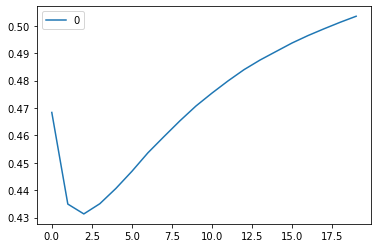

In [61]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [63]:
##grid search

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [55]:
model = neighbors.KNeighborsRegressor(n_neighbors = 2)


In [56]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [57]:
pred=model.predict(X_test)

In [58]:
error = sqrt(mean_squared_error(y_test,pred))

In [59]:
error

1.544424072437894

In [60]:
pred

array([7.24267585, 7.24267585, 7.24267585, ..., 7.24267585, 7.30348877,
       7.24267585])

In [61]:
r2 = r2_score(y_test, pred)


In [62]:
r2

-2.184482001580867

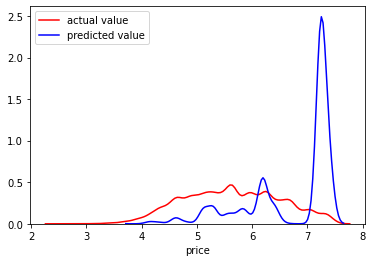

In [63]:
#Plotting the distribution plot
ax1=sns.distplot(y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(pred,hist=False,color='blue',label='predicted value')

# Iteration2 

In [64]:
data_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,129,40.75362,-73.98377,1.380291,3.482156,0.281502,0.500726,11.781786,1,0,0,0
1,1,41,40.68514,-73.95976,0.000000,4.850514,0.834060,0.000000,9.161370,1,0,0,0
2,2,139,40.74767,-73.97500,0.900074,3.857641,0.376726,0.000000,0.000000,1,0,0,0
3,1,13,40.68688,-73.95596,1.910330,3.514008,0.281502,0.000000,0.000000,0,0,1,0
4,2,97,40.76489,-73.98493,0.610228,5.155718,0.788776,0.000000,10.287693,0,0,1,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = .2, random_state=100)

In [69]:
X_train.drop(X_train.columns[[2, 3]], axis = 1, inplace = True) 


C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
X_train.head()

,neighbourhood_group,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
278363,2,209,0.000000,3.396090,0.643433,0.000000,0.000000,0,0,1,0
349084,1,13,0.000000,0.679338,0.056638,0.500726,9.424622,0,0,1,0
371674,1,217,1.080524,2.313414,0.231383,0.000000,0.000000,1,0,0,0
293349,2,96,0.000000,1.536288,0.470898,0.000000,7.386331,0,0,1,0
372527,1,61,0.000000,2.789799,0.575240,0.000000,0.000000,1,0,0,0


In [71]:
X_test.drop(X_test.columns[[2, 3]], axis = 1, inplace = True) 


C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
from sklearn.neighbors import KNeighborsRegressor


In [74]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(pred)

[5.01588268 4.61406388 5.06959699 ... 5.59094423 6.26014126 6.71880347]


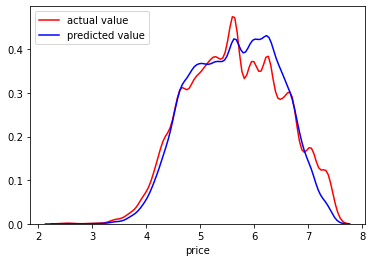

In [75]:
#Plotting the distribution plot
ax1=sns.distplot(y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(pred,hist=False,color='blue',label='predicted value')

In [76]:
r2 = r2_score(y_test, pred)
r2

0.7102285263885366

In [77]:
error = sqrt(mean_squared_error(y_test,pred))
error

0.46505059104628427

In [78]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5213442561099587
RMSE value for k=  2 is: 0.47504611228568994
RMSE value for k=  3 is: 0.46505059104628427
RMSE value for k=  4 is: 0.4650589930493862
RMSE value for k=  5 is: 0.468093368608716
RMSE value for k=  6 is: 0.47232587602107295
RMSE value for k=  7 is: 0.4762959699460404
RMSE value for k=  8 is: 0.4804450807392254
RMSE value for k=  9 is: 0.4850849530192305
RMSE value for k=  10 is: 0.48914674467504626
RMSE value for k=  11 is: 0.49241034446095255
RMSE value for k=  12 is: 0.49628340816130456
RMSE value for k=  13 is: 0.4992002848851873
RMSE value for k=  14 is: 0.502348962641736
RMSE value for k=  15 is: 0.5049952440562788
RMSE value for k=  16 is: 0.5077746465119686
RMSE value for k=  17 is: 0.5099654955977133
RMSE value for k=  18 is: 0.5121189360876263
RMSE value for k=  19 is: 0.514160512058193
RMSE value for k=  20 is: 0.5162083757239551


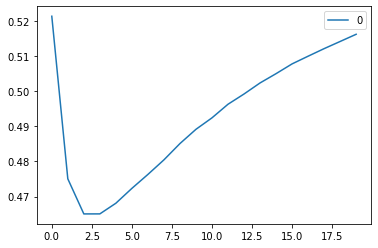

In [79]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [80]:
##grid search

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [81]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,129,40.75362,-73.98377,1.380291,3.482156,0.281502,0.500726,11.781786,1,0,0,0
1,1,41,40.68514,-73.95976,0.000000,4.850514,0.834060,0.000000,9.161370,1,0,0,0
2,2,139,40.74767,-73.97500,0.900074,3.857641,0.376726,0.000000,0.000000,1,0,0,0


In [82]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,7,48,2019-11-04,0.39,2,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,298,2019-11-27,4.65,1,161
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,0
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.39,1,0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,459,2019-12-12,3.53,1,233


In [84]:
data.shape

(570365, 16)

In [85]:
airbnb = data.drop_duplicates()
airbnb.shape

(443727, 16)

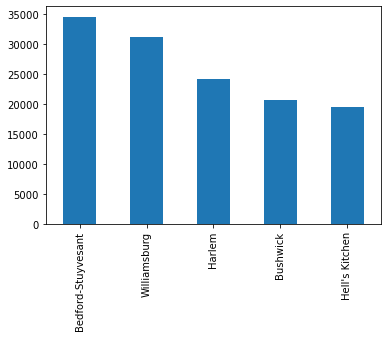

In [86]:
airbnb['neighbourhood'].value_counts().head().plot(kind='bar')

In [88]:
airbnb['neighbourhood'].value_counts().head()

Bedford-Stuyvesant    34567
Williamsburg          31251
Harlem                24175
Bushwick              20700
Hell's Kitchen        19524
Name: neighbourhood, dtype: int64

In [89]:
#finding the mean price and expensive properties area

mean_price = airbnb.groupby(['neighbourhood']).mean()['price']
mean_price = pd.Series(mean_price)

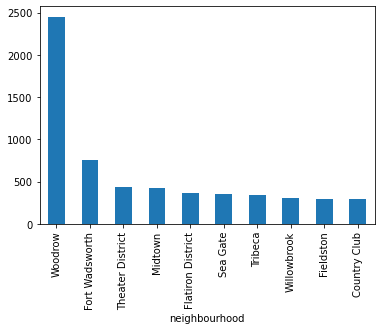

In [90]:
mean_price.sort_values(ascending=False).head(10).plot(kind='bar')


In [91]:
mean_price.sort_values(ascending=False).head(10)

neighbourhood
Woodrow              2451.285714
Fort Wadsworth        756.250000
Theater District      433.321155
Midtown               418.125237
Flatiron District     359.332842
Sea Gate              350.572816
Tribeca               337.407551
Willowbrook           309.000000
Fieldston             293.488889
Country Club          292.000000
Name: price, dtype: float64

In [92]:
mean_price = airbnb.groupby(['room_type']).mean()['price']
mean_price = pd.Series(mean_price)

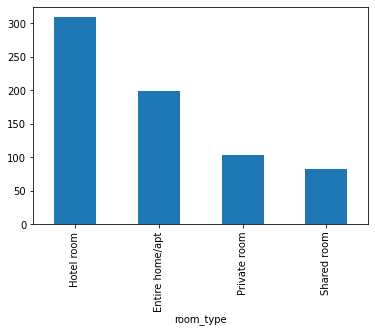

In [93]:
mean_price.sort_values(ascending=False).head(10).plot(kind='bar')


In [94]:
mean_price.sort_values(ascending=False).head(10)

room_type
Hotel room         309.113496
Entire home/apt    198.658275
Private room       103.437949
Shared room         82.096372
Name: price, dtype: float64